In [1]:
import pandas as pd
pd.options.display.max_columns = None
import re
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../Archivos/union_datos.csv")

In [72]:
df.columns

Index(['age', 'gender', 'pais', 'estudios', 'puesto_trabajo', 'experiencia',
       'lenguaje_recomendado', 'experiencia_ML', 'industria', 'tamaño_empresa',
       ...
       'Q38_B_Part_3', 'Q38_B_Part_4', 'Q38_B_Part_5', 'Q38_B_Part_6',
       'Q38_B_Part_7', 'Q38_B_Part_8', 'Q38_B_Part_9', 'Q38_B_Part_10',
       'Q38_B_Part_11', 'Q38_B_OTHER'],
      dtype='object', length=138)

In [86]:
import sidetable
df.stb.missing()

,missing,total,percent
Q29_B_OTHER,25895,25973,99.699688
Q39_Part_3,25837,25973,99.476379
Q32_B_OTHER,25718,25973,99.018211
Q34_B_Part_15,25711,25973,98.991260
Q34_B_Part_10,25705,25973,98.968159
...,...,...,...
gender,0,25973,0.000000
puesto_trabajo,0,25973,0.000000
estudios,0,25973,0.000000
pais,0,25973,0.000000


In [90]:
df.salario.isnull().sum()*100/df.shape[0]

40.74230932121819

In [88]:
df.salario.value_counts()

999        3369
1999        969
14999       950
39999       741
124999      725
7499        699
59999       697
49999       688
24999       587
2999        575
19999       573
9999        552
69999       551
29999       470
79999       464
4999        456
199999      392
89999       391
3999        380
149999      379
99999       350
249999      177
499999       91
299999       75
1000000      58
999999       32
Name: salario, dtype: Int64

In [27]:
df.head(3)

,age,gender,pais,estudios,puesto_trabajo,experiencia,lenguaje_recomendado,experiencia_ML,industria,tamaño_empresa,salario,herramienta_DA,lenguaje_utilizado,IDE,herramientas_visualizacion,Q16,Q17,Q32,Q34,Q10_kaggle,Q10_colab,Q10_none,Q28,Q39_Part_1,Q39_Part_2,Q39_Part_3,Q39_Part_4,Q39_Part_5,Q39_Part_6,Q39_Part_7,Q39_Part_8,Q39_Part_9,Q39_OTHER,Q40_Part_1,Q40_Part_2,Q40_Part_3,Q40_Part_4,Q40_Part_5,Q40_Part_6,Q40_Part_7,Q40_Part_8,Q40_Part_9,Q40_Part_10,Q40_Part_11,Q40_OTHER,Q27_B_Part_1,Q27_B_Part_2,Q27_B_Part_3,Q27_B_Part_4,Q27_B_Part_5,Q27_B_Part_6,Q27_B_Part_7,Q27_B_Part_8,Q27_B_Part_9,Q27_B_Part_10,Q27_B_Part_11,Q27_B_OTHER,Q29_B_Part_1,Q29_B_Part_2,Q29_B_Part_3,Q29_B_Part_4,Q29_B_OTHER,Q31_B_Part_1,Q31_B_Part_2,Q31_B_Part_3,Q31_B_Part_4,Q31_B_Part_5,Q31_B_Part_6,Q31_B_Part_7,Q31_B_Part_8,Q31_B_Part_9,Q31_B_OTHER,Q32_B_Part_1,Q32_B_Part_2,Q32_B_Part_3,Q32_B_Part_4,Q32_B_Part_5,Q32_B_Part_6,Q32_B_Part_7,Q32_B_Part_8,Q32_B_Part_9,Q32_B_Part_10,Q32_B_Part_11,Q32_B_Part_12,Q32_B_Part_13,Q32_B_Part_14,Q32_B_Part_15,Q32_B_Part_16,Q32_B_Part_17,Q32_B_Part_18,Q32_B_Part_19,Q32_B_Part_20,Q32_B_OTHER,Q34_B_Part_1,Q34_B_Part_2,Q34_B_Part_3,Q34_B_Part_4,Q34_B_Part_5,Q34_B_Part_6,Q34_B_Part_7,Q34_B_Part_8,Q34_B_Part_9,Q34_B_Part_10,Q34_B_Part_11,Q34_B_Part_12,Q34_B_Part_13,Q34_B_Part_14,Q34_B_Part_15,Q34_B_Part_16,Q34_B_OTHER,Q36_B_Part_1,Q36_B_Part_2,Q36_B_Part_3,Q36_B_Part_4,Q36_B_Part_5,Q36_B_Part_6,Q36_B_Part_7,Q36_B_OTHER,Q37_B_Part_1,Q37_B_Part_2,Q37_B_Part_3,Q37_B_Part_4,Q37_B_Part_5,Q37_B_Part_6,Q37_B_Part_7,Q37_B_OTHER,Q38_B_Part_1,Q38_B_Part_2,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
0,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,5-10 years,Manufacturing/Fabrication,50-249 employees,"25,000-29,999","Local development environments (RStudio, Jupyt...","Python, R",Vim / Emacs,"Matplotlib ,Seaborn ,Ggplot / ggplot2 ,Shiny ...","Scikit-learn , TensorFlow ,Caret","Linear or Logistic Regression, Decision Trees ...",PostgreSQL,None,NaN,Colab Notebooks,NaN,NaN,NaN,NaN,NaN,GitHub,NaN,Kaggle,NaN,NaN,NaN,NaN,Coursera,edX,Kaggle Learn Courses,DataCamp,NaN,Udacity,Udemy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,Python,< 1 year,Manufacturing/Fabrication,"1000-9,999 employees","60,000-69,999","Advanced statistical software (SPSS, SAS, etc.)","SQL, C, C++, Java","Notepad++,Jupyter Notebook",Matplotlib,Scikit-learn,"Linear or Logistic Regression, Decision Trees ...",NaN,NaN,Kaggle Notebooks,Colab Notebooks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Kaggle Learn Courses,NaN,NaN,NaN,NaN,NaN,"Cloud-certification programs (direct from AWS,...",University Courses (resulting in a university ...,NaN,NaN,NaN,NaN,Google Cloud Platform (GCP),NaN,Oracle Cloud,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Google Cloud Compute Engine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,MySQL,NaN,SQLite,Oracle Database,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Google Cloud SQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Google Data Studio,NaN,NaN,NaN,NaN,Qlik,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Automated model selection (e.g. auto-sklearn, ...",NaN,NaN,NaN,NaN,NaN,Google Cloud AutoML,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
2,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,I do not use machine learning methods,Academics/Education,"1000-9,999 employees",$0-999,"Basic statistical software (Microsoft Excel, G...","Python, C++, Java","PyCharm ,Jupyter Notebook, Other",Matplotlib,NaN,NaN,"MySQL ,

In [91]:
df.age.dtypes

dtype('O')

In [95]:
df[df["puesto_trabajo"]!= "Student"].stb.freq(["puesto_trabajo"])

,puesto_trabajo,count,percent,cumulative_count,cumulative_percent
0,Data Scientist,3616,18.863790,3616,18.863790
1,Software Engineer,2449,12.775836,6065,31.639626
2,Other,2393,12.483698,8458,44.123324
3,Data Analyst,2301,12.003756,10759,56.127080
4,Currently not employed,1986,10.360478,12745,66.487558
5,Research Scientist,1538,8.023371,14283,74.510929
6,Machine Learning Engineer,1499,7.819918,15782,82.330847
7,Business Analyst,968,5.049820,16750,87.380667
8,Program/Project Manager,849,4.429026,17599,91.809693
9,Data Engineer,668,3.484793,18267,95.294486


In [92]:
df.puesto_trabajo.value_counts()

Student                         6804
Data Scientist                  3616
Software Engineer               2449
Other                           2393
Data Analyst                    2301
Currently not employed          1986
Research Scientist              1538
Machine Learning Engineer       1499
Business Analyst                 968
Program/Project Manager          849
Data Engineer                    668
Product Manager                  319
Statistician                     313
DBA/Database Engineer            171
Developer Relations/Advocacy      99
Name: puesto_trabajo, dtype: int64

---

### Renombrado columnas

---

In [28]:
#Definimos función para ver nulos y otra renombrar columnas
def nulos(col_ini, col_fin):
    no_nulos = df.loc[:, col_ini : col_fin].notnull().sum()/df.shape[0]*100 
    for col in no_nulos.index:
        print (col, '--->', df[col].value_counts().index[0], '--->', (df.loc[:,col].notnull().sum()/df.shape[0]*100).round(2),'%' )

def renombrar(col_ini, col_fin):
        lista =[]
        no_nulos = df.loc[:, col_ini : col_fin].notnull().sum()/df.shape[0]*100    
        for col in no_nulos.index:
            nombre = df[col].value_counts().index[0]
            lista.append(re.findall('Q\d{2}',col)[0]+'_'+nombre.lower().strip().replace(' ','_'))
        columnas = dict(zip(no_nulos.index, lista))
        return columnas

In [30]:
df_copia2= df.copy()

In [31]:
# Pasamos una función para unirlos, borra los nan y los convierte en un string vacío
df_copia2['concat_q39'] = df_copia2[['Q39__github','Q39__kaggle','Q39__colab','Q39_none']].apply(lambda x: ','.join(x.dropna().astype(str)), axis=1)
# Reemplazamos los strings vacios por nan
df_copia2["concat_q39"].replace("", np.nan, inplace=True)

KeyError: "None of [Index(['Q39__github', 'Q39__kaggle', 'Q39__colab', 'Q39_none'], dtype='object')] are in the [columns]"

### Q39 donde compartes publicamente tu trabajo

---

In [32]:
nulos('Q39_Part_1','Q39_OTHER')

Q39_Part_1 --->  Plotly Dash  ---> 1.13 %
Q39_Part_2 --->  Streamlit  ---> 1.49 %
Q39_Part_3 --->  NBViewer  ---> 0.52 %
Q39_Part_4 --->  GitHub  ---> 17.66 %
Q39_Part_5 --->  Personal blog  ---> 2.71 %
Q39_Part_6 --->  Kaggle  ---> 11.8 %
Q39_Part_7 --->  Colab  ---> 7.12 %
Q39_Part_8 --->  Shiny  ---> 1.17 %
Q39_Part_9 ---> I do not share my work publicly ---> 12.19 %
Q39_OTHER ---> Other ---> 1.18 %


### Q39 donde compartes publicamente tu trabajo
    Q39_Part_1 --->  Plotly Dash  ---> 1.13 %
    Q39_Part_2 --->  Streamlit  ---> 1.49 %
    Q39_Part_3 --->  NBViewer  ---> 0.52 %
    Q39_Part_4 --->  GitHub  ---> 17.66 %
    Q39_Part_5 --->  Personal blog  ---> 2.71 %
    Q39_Part_6 --->  Kaggle  ---> 11.8 %
    Q39_Part_7 --->  Colab  ---> 7.12 %
    Q39_Part_8 --->  Shiny  ---> 1.17 %
    Q39_Part_9 ---> I do not share my work publicly ---> 12.19 %
    Q39_OTHER ---> Other ---> 1.18 %

Nos quedamos con las columnas más representativas: GitHub, I do not share my work publicly, Kaggle, Colab

In [33]:
df.drop(['Q39_Part_1', 'Q39_Part_2','Q39_Part_3','Q39_Part_5','Q39_Part_8','Q39_OTHER'], axis = 1, inplace = True)

In [34]:
renombrar('Q39_Part_4','Q39_Part_9')

{'Q39_Part_4': 'Q39_github',
 'Q39_Part_6': 'Q39_kaggle',
 'Q39_Part_7': 'Q39_colab',
 'Q39_Part_9': 'Q39_i_do_not_share_my_work_publicly'}

In [35]:
#Cambiamos el nombre a las columnas de Q39
col_q39 = {'Q39_Part_4': 'Q39__github',
 'Q39_Part_6': 'Q39__kaggle',
 'Q39_Part_7': 'Q39__colab',
 'Q39_Part_9': 'Q39_none'}
df.rename(columns = col_q39, inplace = True)

### Q40 en que plataformas has realizado cursos de data science

---

In [36]:
nulos('Q40_Part_1','Q40_OTHER')

Q40_Part_1 ---> Coursera ---> 37.15 %
Q40_Part_2 ---> edX ---> 11.66 %
Q40_Part_3 ---> Kaggle Learn Courses ---> 33.38 %
Q40_Part_4 ---> DataCamp ---> 15.39 %
Q40_Part_5 ---> Fast.ai ---> 4.45 %
Q40_Part_6 ---> Udacity ---> 10.79 %
Q40_Part_7 ---> Udemy ---> 24.79 %
Q40_Part_8 ---> LinkedIn Learning ---> 10.37 %
Q40_Part_9 ---> Cloud-certification programs (direct from AWS, Azure, GCP, or similar) ---> 6.95 %
Q40_Part_10 ---> University Courses (resulting in a university degree) ---> 18.8 %
Q40_Part_11 ---> None ---> 6.78 %
Q40_OTHER ---> Other ---> 8.01 %


### Q40 en que plataformas has realizado cursos de data science
    Q40_Part_1 ---> Coursera ---> 37.15 %
    Q40_Part_2 ---> edX ---> 11.66 %
    Q40_Part_3 ---> Kaggle Learn Courses ---> 33.38 %
    Q40_Part_4 ---> DataCamp ---> 15.39 %
    Q40_Part_5 ---> Fast.ai ---> 4.45 %
    Q40_Part_6 ---> Udacity ---> 10.79 %
    Q40_Part_7 ---> Udemy ---> 24.79 %
    Q40_Part_8 ---> LinkedIn Learning ---> 10.37 %
    Q40_Part_9 ---> Cloud-certification programs (direct from AWS, Azure, GCP, or similar) ---> 6.95 %
    Q40_Part_10 ---> University Courses (resulting in a university degree) ---> 18.8 %
    Q40_Part_11 ---> None ---> 6.78 %
    Q40_OTHER ---> Other ---> 8.01 %


In [37]:
renombrar('Q40_Part_1','Q40_OTHER')

{'Q40_Part_1': 'Q40_coursera',
 'Q40_Part_2': 'Q40_edx',
 'Q40_Part_3': 'Q40_kaggle_learn_courses',
 'Q40_Part_4': 'Q40_datacamp',
 'Q40_Part_5': 'Q40_fast.ai',
 'Q40_Part_6': 'Q40_udacity',
 'Q40_Part_7': 'Q40_udemy',
 'Q40_Part_8': 'Q40_linkedin_learning',
 'Q40_Part_9': 'Q40_cloud-certification_programs_(direct_from_aws,_azure,_gcp,_or_similar)',
 'Q40_Part_10': 'Q40_university_courses_(resulting_in_a_university_degree)',
 'Q40_Part_11': 'Q40_none',
 'Q40_OTHER': 'Q40_other'}

In [38]:
col_q40 = {'Q40_Part_1': 'Q40_coursera',
 'Q40_Part_2': 'Q40_edx',
 'Q40_Part_3': 'Q40_kaggle_learn_courses',
 'Q40_Part_4': 'Q40_datacamp',
 'Q40_Part_5': 'Q40_fast.ai',
 'Q40_Part_6': 'Q40_udacity',
 'Q40_Part_7': 'Q40_udemy',
 'Q40_Part_8': 'Q40_linkedin_learning',
 'Q40_Part_9': 'Q40_cloud-certification',
 'Q40_Part_10': 'Q40_university_courses',
 'Q40_Part_11': 'Q40_none',
 'Q40_OTHER': 'Q40_other'}
df.rename(columns = col_q40, inplace = True)

### Q27B - En que plataformas de cloud computing esperas familiarizarte en los próximos 2 años

---

In [39]:
nulos('Q27_B_Part_1','Q27_B_OTHER')

Q27_B_Part_1 --->  Amazon Web Services (AWS)  ---> 28.85 %
Q27_B_Part_2 --->  Microsoft Azure  ---> 21.75 %
Q27_B_Part_3 --->  Google Cloud Platform (GCP)  ---> 28.81 %
Q27_B_Part_4 --->  IBM Cloud / Red Hat  ---> 9.97 %
Q27_B_Part_5 --->  Oracle Cloud  ---> 6.59 %
Q27_B_Part_6 --->  SAP Cloud  ---> 3.5 %
Q27_B_Part_7 --->  VMware Cloud  ---> 3.02 %
Q27_B_Part_8 --->  Salesforce Cloud  ---> 3.05 %
Q27_B_Part_9 --->  Alibaba Cloud  ---> 2.43 %
Q27_B_Part_10 --->  Tencent Cloud  ---> 2.12 %
Q27_B_Part_11 ---> None ---> 8.62 %
Q27_B_OTHER ---> Other ---> 1.04 %


### Q27B - En que plataformas de cloud computing esperas familiarizarte en los próximos 2 años
    Q27_B_Part_1 --->  Amazon Web Services (AWS)  ---> 28.85 %
    Q27_B_Part_2 --->  Microsoft Azure  ---> 21.75 %
    Q27_B_Part_3 --->  Google Cloud Platform (GCP)  ---> 28.81 %
    Q27_B_Part_4 --->  IBM Cloud / Red Hat  ---> 9.97 %
    Q27_B_Part_5 --->  Oracle Cloud  ---> 6.59 %
    Q27_B_Part_6 --->  SAP Cloud  ---> 3.5 %
    Q27_B_Part_7 --->  VMware Cloud  ---> 3.02 %
    Q27_B_Part_8 --->  Salesforce Cloud  ---> 3.05 %
    Q27_B_Part_9 --->  Alibaba Cloud  ---> 2.43 %
    Q27_B_Part_10 --->  Tencent Cloud  ---> 2.12 %
    Q27_B_Part_11 ---> None ---> 8.62 %
    Q27_B_OTHER ---> Other ---> 1.04 %


In [40]:
col_q27b = renombrar('Q27_B_Part_1','Q27_B_OTHER')
df.rename(columns = col_q27b, inplace = True)

### Q29B - En que productos específicos de cloud computing esperas familiarizarte en los próximos 2 años

---

In [41]:
nulos('Q29_B_Part_1','Q29_B_OTHER')

Q29_B_Part_1 --->  Amazon Elastic Compute Cloud (EC2)  ---> 20.71 %
Q29_B_Part_2 --->  Microsoft Azure Virtual Machines  ---> 22.3 %
Q29_B_Part_3 --->  Google Cloud Compute Engine  ---> 28.86 %
Q29_B_Part_4 ---> None ---> 3.73 %
Q29_B_OTHER ---> Other ---> 0.3 %


### Q29B - En que productos específicos de cloud computing esperas familiarizarte en los próximos 2 años
    Q29_B_Part_1 --->  Amazon Elastic Compute Cloud (EC2)  ---> 20.71 %
    Q29_B_Part_2 --->  Microsoft Azure Virtual Machines  ---> 22.3 %
    Q29_B_Part_3 --->  Google Cloud Compute Engine  ---> 28.86 %
    Q29_B_Part_4 ---> None ---> 3.73 %
    Q29_B_OTHER ---> Other ---> 0.3 %

In [42]:
df.drop(['Q29_B_OTHER'], axis = 1, inplace = True)

In [43]:
col_q29b = renombrar('Q29_B_Part_1','Q29_B_Part_4')
df.rename(columns = col_q29b, inplace = True)

### Q31B - En que productos machine learning esperas familiarizarte en los próximos 2 años

---

In [44]:
nulos('Q31_B_Part_1','Q31_B_OTHER')

Q31_B_Part_1 --->  Amazon SageMaker  ---> 14.05 %
Q31_B_Part_2 --->  Azure Machine Learning Studio  ---> 19.36 %
Q31_B_Part_3 --->  Google Cloud Vertex AI ---> 20.42 %
Q31_B_Part_4 --->  DataRobot ---> 7.05 %
Q31_B_Part_5 --->  Databricks ---> 8.48 %
Q31_B_Part_6 --->  Dataiku ---> 2.94 %
Q31_B_Part_7 --->  Alteryx ---> 3.05 %
Q31_B_Part_8 --->  Rapidminer ---> 3.92 %
Q31_B_Part_9 ---> None ---> 15.83 %
Q31_B_OTHER ---> Other ---> 1.34 %


### Q31B - En que productos machine learning esperas familiarizarte en los próximos 2 años
    Q31_B_Part_1 --->  Amazon SageMaker  ---> 14.05 %
    Q31_B_Part_2 --->  Azure Machine Learning Studio  ---> 19.36 %
    Q31_B_Part_3 --->  Google Cloud Vertex AI ---> 20.42 %
    Q31_B_Part_4 --->  DataRobot ---> 7.05 %
    Q31_B_Part_5 --->  Databricks ---> 8.48 %
    Q31_B_Part_6 --->  Dataiku ---> 2.94 %
    Q31_B_Part_7 --->  Alteryx ---> 3.05 %
    Q31_B_Part_8 --->  Rapidminer ---> 3.92 %
    Q31_B_Part_9 ---> None ---> 15.83 %
    Q31_B_OTHER ---> Other ---> 1.34 %

In [45]:
col_q31b = renombrar('Q31_B_Part_1','Q31_B_OTHER')
df.rename(columns = col_q31b, inplace = True)

### Q32B - En que productos de big data esperas familiarizarte en los próximos 2 años

---

In [46]:
nulos('Q32_B_Part_1','Q32_B_OTHER')

Q32_B_Part_1 ---> MySQL  ---> 23.62 %
Q32_B_Part_2 ---> PostgreSQL  ---> 12.66 %
Q32_B_Part_3 ---> SQLite  ---> 11.69 %
Q32_B_Part_4 ---> Oracle Database  ---> 8.87 %
Q32_B_Part_5 ---> MongoDB  ---> 16.51 %
Q32_B_Part_6 ---> Snowflake  ---> 4.18 %
Q32_B_Part_7 ---> IBM Db2  ---> 4.6 %
Q32_B_Part_8 ---> Microsoft SQL Server  ---> 12.1 %
Q32_B_Part_9 ---> Microsoft Azure SQL Database  ---> 10.32 %
Q32_B_Part_10 ---> Microsoft Azure Cosmos DB  ---> 5.97 %
Q32_B_Part_11 ---> Amazon Redshift  ---> 4.66 %
Q32_B_Part_12 ---> Amazon Aurora  ---> 4.55 %
Q32_B_Part_13 ---> Amazon DynamoDB  ---> 5.75 %
Q32_B_Part_14 ---> Amazon RDS  ---> 8.64 %
Q32_B_Part_15 ---> Google Cloud BigQuery  ---> 10.95 %
Q32_B_Part_16 ---> Google Cloud SQL  ---> 12.64 %
Q32_B_Part_17 ---> Google Cloud Firestore  ---> 6.26 %
Q32_B_Part_18 ---> Google Cloud BigTable  ---> 7.89 %
Q32_B_Part_19 ---> Google Cloud Spanner  ---> 4.82 %
Q32_B_Part_20 ---> None ---> 7.21 %
Q32_B_OTHER ---> Other ---> 0.98 %


### Q32B - En que productos de big data esperas familiarizarte en los próximos 2 años
    Q32_B_Part_1 ---> MySQL  ---> 23.62 %
    Q32_B_Part_2 ---> PostgreSQL  ---> 12.66 %
    Q32_B_Part_3 ---> SQLite  ---> 11.69 %
    Q32_B_Part_4 ---> Oracle Database  ---> 8.87 %
    Q32_B_Part_5 ---> MongoDB  ---> 16.51 %
    Q32_B_Part_6 ---> Snowflake  ---> 4.18 %
    Q32_B_Part_7 ---> IBM Db2  ---> 4.6 %
    Q32_B_Part_8 ---> Microsoft SQL Server  ---> 12.1 %
    Q32_B_Part_9 ---> Microsoft Azure SQL Database  ---> 10.32 %
    Q32_B_Part_10 ---> Microsoft Azure Cosmos DB  ---> 5.97 %
    Q32_B_Part_11 ---> Amazon Redshift  ---> 4.66 %
    Q32_B_Part_12 ---> Amazon Aurora  ---> 4.55 %
    Q32_B_Part_13 ---> Amazon DynamoDB  ---> 5.75 %
    Q32_B_Part_14 ---> Amazon RDS  ---> 8.64 %
    Q32_B_Part_15 ---> Google Cloud BigQuery  ---> 10.95 %
    Q32_B_Part_16 ---> Google Cloud SQL  ---> 12.64 %
    Q32_B_Part_17 ---> Google Cloud Firestore  ---> 6.26 %
    Q32_B_Part_18 ---> Google Cloud BigTable  ---> 7.89 %
    Q32_B_Part_19 ---> Google Cloud Spanner  ---> 4.82 %
    Q32_B_Part_20 ---> None ---> 7.21 %
    Q32_B_OTHER ---> Other ---> 0.98 %


In [47]:
df.drop(['Q32_B_OTHER'], axis = 1, inplace = True)

In [48]:
col_q32b = renombrar('Q32_B_Part_1','Q32_B_Part_20')
df.rename(columns = col_q32b, inplace = True)

### Q34B - En que herramientas de business intelligence esperas familiarizarte en los próximos 2 años

---

In [49]:
nulos('Q34_B_Part_1','Q34_B_OTHER')

Q34_B_Part_1 ---> Microsoft Power BI ---> 18.95 %
Q34_B_Part_2 ---> Amazon QuickSight ---> 4.88 %
Q34_B_Part_3 ---> Google Data Studio ---> 15.75 %
Q34_B_Part_4 ---> Looker ---> 2.15 %
Q34_B_Part_5 ---> Tableau ---> 20.87 %
Q34_B_Part_6 ---> Salesforce ---> 4.87 %
Q34_B_Part_7 ---> Tableau CRM ---> 6.54 %
Q34_B_Part_8 ---> Qlik ---> 3.01 %
Q34_B_Part_9 ---> Domo ---> 1.06 %
Q34_B_Part_10 ---> TIBCO Spotfire ---> 1.03 %
Q34_B_Part_11 ---> Alteryx  ---> 2.03 %
Q34_B_Part_12 ---> Sisense  ---> 1.21 %
Q34_B_Part_13 ---> SAP Analytics Cloud  ---> 5.17 %
Q34_B_Part_14 ---> Microsoft Azure Synapse  ---> 6.53 %
Q34_B_Part_15 ---> Thoughtspot  ---> 1.01 %
Q34_B_Part_16 ---> None ---> 11.77 %
Q34_B_OTHER ---> Other ---> 1.12 %


### Q34B - En que herramientas de business intelligence esperas familiarizarte en los próximos 2 años
    Q34_B_Part_1 ---> Microsoft Power BI ---> 18.95 %
    Q34_B_Part_2 ---> Amazon QuickSight ---> 4.88 %
    Q34_B_Part_3 ---> Google Data Studio ---> 15.75 %
    Q34_B_Part_4 ---> Looker ---> 2.15 %
    Q34_B_Part_5 ---> Tableau ---> 20.87 %
    Q34_B_Part_6 ---> Salesforce ---> 4.87 %
    Q34_B_Part_7 ---> Tableau CRM ---> 6.54 %
    Q34_B_Part_8 ---> Qlik ---> 3.01 %
    Q34_B_Part_9 ---> Domo ---> 1.06 %
    Q34_B_Part_10 ---> TIBCO Spotfire ---> 1.03 %
    Q34_B_Part_11 ---> Alteryx  ---> 2.03 %
    Q34_B_Part_12 ---> Sisense  ---> 1.21 %
    Q34_B_Part_13 ---> SAP Analytics Cloud  ---> 5.17 %
    Q34_B_Part_14 ---> Microsoft Azure Synapse  ---> 6.53 %
    Q34_B_Part_15 ---> Thoughtspot  ---> 1.01 %
    Q34_B_Part_16 ---> None ---> 11.77 %
    Q34_B_OTHER ---> Other ---> 1.12 %

In [50]:
col_q34b = renombrar('Q34_B_Part_1','Q34_B_OTHER')
df.rename(columns = col_q34b, inplace = True)

### Q36B - En que categorías de herramientas de machine learning esperas familiarizarte en los próximos 2 años

---

In [51]:
nulos('Q36_B_Part_1','Q36_B_OTHER')

Q36_B_Part_1 ---> Automated data augmentation (e.g. imgaug, albumentations) ---> 13.46 %
Q36_B_Part_2 ---> Automated feature engineering/selection (e.g. tpot, boruta_py) ---> 14.05 %
Q36_B_Part_3 ---> Automated model selection (e.g. auto-sklearn, xcessiv) ---> 18.33 %
Q36_B_Part_4 ---> Automated model architecture searches (e.g. darts, enas) ---> 8.4 %
Q36_B_Part_5 ---> Automated hyperparameter tuning (e.g. hyperopt, ray.tune, Vizier) ---> 12.82 %
Q36_B_Part_6 ---> Automation of full ML pipelines (e.g. Google Cloud AutoML, H2O Driverless AI) ---> 18.3 %
Q36_B_Part_7 ---> None ---> 12.4 %
Q36_B_OTHER ---> Other ---> 1.24 %


### Q36B - En que categorías de herramientas de machine learning esperas familiarizarte en los próximos 2 años
    Q36_B_Part_1 ---> Automated data augmentation (e.g. imgaug, albumentations) ---> 13.46 %
    Q36_B_Part_2 ---> Automated feature engineering/selection (e.g. tpot, boruta_py) ---> 14.05 %
    Q36_B_Part_3 ---> Automated model selection (e.g. auto-sklearn, xcessiv) ---> 18.33 %
    Q36_B_Part_4 ---> Automated model architecture searches (e.g. darts, enas) ---> 8.4 %
    Q36_B_Part_5 ---> Automated hyperparameter tuning (e.g. hyperopt, ray.tune, Vizier) ---> 12.82 %
    Q36_B_Part_6 ---> Automation of full ML pipelines (e.g. Google Cloud AutoML, H2O Driverless AI) ---> 18.3 %
    Q36_B_Part_7 ---> None ---> 12.4 %
    Q36_B_OTHER ---> Other ---> 1.24 %

In [52]:
renombrar('Q36_B_Part_1','Q36_B_OTHER')

{'Q36_B_Part_1': 'Q36_automated_data_augmentation_(e.g._imgaug,_albumentations)',
 'Q36_B_Part_2': 'Q36_automated_feature_engineering/selection_(e.g._tpot,_boruta_py)',
 'Q36_B_Part_3': 'Q36_automated_model_selection_(e.g._auto-sklearn,_xcessiv)',
 'Q36_B_Part_4': 'Q36_automated_model_architecture_searches_(e.g._darts,_enas)',
 'Q36_B_Part_5': 'Q36_automated_hyperparameter_tuning_(e.g._hyperopt,_ray.tune,_vizier)',
 'Q36_B_Part_6': 'Q36_automation_of_full_ml_pipelines_(e.g._google_cloud_automl,_h2o_driverless_ai)',
 'Q36_B_Part_7': 'Q36_none',
 'Q36_B_OTHER': 'Q36_other'}

In [53]:
col_q36b = {'Q36_B_Part_1': 'Q36_data_augmentation',
 'Q36_B_Part_2': 'Q36_feature_engineering/selection',
 'Q36_B_Part_3': 'Q36_model_selection',
 'Q36_B_Part_4': 'Q36_model_architecture_searches',
 'Q36_B_Part_5': 'Q36_hyperparameter_tuning',
 'Q36_B_Part_6': 'Q36_full_ml_pipelines',
 'Q36_B_Part_7': 'Q36_none',
 'Q36_B_OTHER': 'Q36_other'}
df.rename(columns = col_q36b, inplace = True)

### Q37B - En que herramientas específicas de machine learning esperas familiarizarte en los próximos 2 años

---

In [54]:
nulos('Q37_B_Part_1','Q37_B_OTHER')

Q37_B_Part_1 --->  Google Cloud AutoML  ---> 18.55 %
Q37_B_Part_2 --->  H2O Driverless AI   ---> 5.34 %
Q37_B_Part_3 --->  Databricks AutoML  ---> 6.35 %
Q37_B_Part_4 --->  DataRobot AutoML  ---> 5.95 %
Q37_B_Part_5 --->   Amazon Sagemaker Autopilot  ---> 10.33 %
Q37_B_Part_6 --->   Azure Automated Machine Learning  ---> 12.14 %
Q37_B_Part_7 ---> None ---> 5.38 %
Q37_B_OTHER ---> Other ---> 1.08 %


### Q37B - En que herramientas específicas de machine learning esperas familiarizarte en los próximos 2 años
    Q37_B_Part_1 --->  Google Cloud AutoML  ---> 18.55 %
    Q37_B_Part_2 --->  H2O Driverless AI   ---> 5.34 %
    Q37_B_Part_3 --->  Databricks AutoML  ---> 6.35 %
    Q37_B_Part_4 --->  DataRobot AutoML  ---> 5.95 %
    Q37_B_Part_5 --->   Amazon Sagemaker Autopilot  ---> 10.33 %
    Q37_B_Part_6 --->   Azure Automated Machine Learning  ---> 12.14 %
    Q37_B_Part_7 ---> None ---> 5.38 %
    Q37_B_OTHER ---> Other ---> 1.08 %

In [55]:
col_q37b = renombrar('Q37_B_Part_1','Q37_B_OTHER')
df.rename(columns = col_q37b, inplace = True)

### Q38B - En que herramientas de gestion de machine learning esperas familiarizarte en los próximos 2 años

---

In [56]:
nulos('Q38_B_Part_1','Q38_B_OTHER')

Q38_B_Part_1 --->  Neptune.ai  ---> 4.91 %
Q38_B_Part_2 --->  Weights & Biases  ---> 6.09 %
Q38_B_Part_3 --->  Comet.ml  ---> 2.44 %
Q38_B_Part_4 --->  Sacred + Omniboard  ---> 2.28 %
Q38_B_Part_5 --->  TensorBoard  ---> 16.32 %
Q38_B_Part_6 --->  Guild.ai  ---> 2.81 %
Q38_B_Part_7 --->  Polyaxon  ---> 2.84 %
Q38_B_Part_8 --->  ClearML  ---> 3.93 %
Q38_B_Part_9 --->  Domino Model Monitor  ---> 2.56 %
Q38_B_Part_10 --->  MLflow  ---> 10.58 %
Q38_B_Part_11 ---> None ---> 17.49 %
Q38_B_OTHER ---> Other ---> 1.45 %


### Q38B - En que herramientas de gestion de machine learning esperas familiarizarte en los próximos 2 años
    Q38_B_Part_1 --->  Neptune.ai  ---> 4.91 %
    Q38_B_Part_2 --->  Weights & Biases  ---> 6.09 %
    Q38_B_Part_3 --->  Comet.ml  ---> 2.44 %
    Q38_B_Part_4 --->  Sacred + Omniboard  ---> 2.28 %
    Q38_B_Part_5 --->  TensorBoard  ---> 16.32 %
    Q38_B_Part_6 --->  Guild.ai  ---> 2.81 %
    Q38_B_Part_7 --->  Polyaxon  ---> 2.84 %
    Q38_B_Part_8 --->  ClearML  ---> 3.93 %
    Q38_B_Part_9 --->  Domino Model Monitor  ---> 2.56 %
    Q38_B_Part_10 --->  MLflow  ---> 10.58 %
    Q38_B_Part_11 ---> None ---> 17.49 %
    Q38_B_OTHER ---> Other ---> 1.45 %

In [57]:
col_q38b = renombrar('Q38_B_Part_1','Q38_B_OTHER')
df.rename(columns = col_q38b, inplace = True)

In [58]:
df.head(2)

,age,gender,pais,estudios,puesto_trabajo,experiencia,lenguaje_recomendado,experiencia_ML,industria,tamaño_empresa,salario,herramienta_DA,lenguaje_utilizado,IDE,herramientas_visualizacion,Q16,Q17,Q32,Q34,Q10_kaggle,Q10_colab,Q10_none,Q28,Q39__github,Q39__kaggle,Q39__colab,Q39_none,Q40_coursera,Q40_edx,Q40_kaggle_learn_courses,Q40_datacamp,Q40_fast.ai,Q40_udacity,Q40_udemy,Q40_linkedin_learning,Q40_cloud-certification,Q40_university_courses,Q40_none,Q40_other,Q27_amazon_web_services_(aws),Q27_microsoft_azure,Q27_google_cloud_platform_(gcp),Q27_ibm_cloud_/_red_hat,Q27_oracle_cloud,Q27_sap_cloud,Q27_vmware_cloud,Q27_salesforce_cloud,Q27_alibaba_cloud,Q27_tencent_cloud,Q27_none,Q27_other,Q29_amazon_elastic_compute_cloud_(ec2),Q29_microsoft_azure_virtual_machines,Q29_google_cloud_compute_engine,Q29_none,Q31_amazon_sagemaker,Q31_azure_machine_learning_studio,Q31_google_cloud_vertex_ai,Q31_datarobot,Q31_databricks,Q31_dataiku,Q31_alteryx,Q31_rapidminer,Q31_none,Q31_other,Q32_mysql,Q32_postgresql,Q32_sqlite,Q32_oracle_database,Q32_mongodb,Q32_snowflake,Q32_ibm_db2,Q32_microsoft_sql_server,Q32_microsoft_azure_sql_database,Q32_microsoft_azure_cosmos_db,Q32_amazon_redshift,Q32_amazon_aurora,Q32_amazon_dynamodb,Q32_amazon_rds,Q32_google_cloud_bigquery,Q32_google_cloud_sql,Q32_google_cloud_firestore,Q32_google_cloud_bigtable,Q32_google_cloud_spanner,Q32_none,Q34_microsoft_power_bi,Q34_amazon_quicksight,Q34_google_data_studio,Q34_looker,Q34_tableau,Q34_salesforce,Q34_tableau_crm,Q34_qlik,Q34_domo,Q34_tibco_spotfire,Q34_alteryx,Q34_sisense,Q34_sap_analytics_cloud,Q34_microsoft_azure_synapse,Q34_thoughtspot,Q34_none,Q34_other,Q36_data_augmentation,Q36_feature_engineering/selection,Q36_model_selection,Q36_model_architecture_searches,Q36_hyperparameter_tuning,Q36_full_ml_pipelines,Q36_none,Q36_other,Q37_google_cloud_automl,Q37_h2o_driverless_ai,Q37_databricks_automl,Q37_datarobot_automl,Q37_amazon_sagemaker_autopilot,Q37_azure_automated_machine_learning,Q37_none,Q37_other,Q38_neptune.ai,Q38_weights_&_biases,Q38_comet.ml,Q38_sacred_+_omniboard,Q38_tensorboard,Q38_guild.ai,Q38_polyaxon,Q38_clearml,Q38_domino_model_monitor,Q38_mlflow,Q38_none,Q38_other
0,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,5-10 years,Manufacturing/Fabrication,50-249 employees,"25,000-29,999","Local development environments (RStudio, Jupyt...","Python, R",Vim / Emacs,"Matplotlib ,Seaborn ,Ggplot / ggplot2 ,Shiny ...","Scikit-learn , TensorFlow ,Caret","Linear or Logistic Regression, Decision Trees ...",PostgreSQL,None,NaN,Colab Notebooks,NaN,NaN,GitHub,Kaggle,NaN,NaN,Coursera,edX,Kaggle Learn Courses,DataCamp,NaN,Udacity,Udemy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,Python,< 1 year,Manufacturing/Fabrication,"1000-9,999 employees","60,000-69,999","Advanced statistical software (SPSS, SAS, etc.)","SQL, C, C++, Java","Notepad++,Jupyter Notebook",Matplotlib,Scikit-learn,"Linear or Logistic Regression, Decision Trees ...",NaN,NaN,Kaggle Notebooks,Colab Notebooks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Kaggle Learn Courses,NaN,NaN,NaN,NaN,NaN,"Cloud-certification programs (direct from AWS,...",University Courses (resulting in a university ...,NaN,NaN,NaN,NaN,Google Cloud Platform (GCP),NaN,Oracle Cloud,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Google Cloud Compute Engine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,MySQL,NaN,SQLite,Oracle Database,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Google Cloud SQL,NaN,NaN,NaN,NaN,NaN,NaN,Google Data Studio,NaN,NaN,NaN,NaN,Qlik,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Automated model selection (e.g. auto-sklearn, ...",NaN,NaN,

## Columna salario

In [59]:
df["salario"].unique()

array(['25,000-29,999', '60,000-69,999', '$0-999', '30,000-39,999', nan,
       '15,000-19,999', '70,000-79,999', '2,000-2,999', '10,000-14,999',
       '5,000-7,499', '20,000-24,999', '1,000-1,999', '100,000-124,999',
       '7,500-9,999', '4,000-4,999', '40,000-49,999', '50,000-59,999',
       '3,000-3,999', '300,000-499,999', '200,000-249,999',
       '125,000-149,999', '250,000-299,999', '80,000-89,999',
       '90,000-99,999', '150,000-199,999', '>$1,000,000',
       '$500,000-999,999'], dtype=object)

In [76]:
def limpiar(x):
    try:
        return x.split("-")[1].replace(",","")
    except:
        return x

In [77]:
def quitar_dolar(x):
    try:
        return x.replace(">$","").replace(",","")
    except:
        return x

In [78]:
df["salario"] = df["salario"].apply(limpiar).apply(quitar_dolar).astype("Int64", errors= "raise")

In [79]:
df["salario"].unique()

<IntegerArray>
[  29999,   69999,     999,   39999,    <NA>,   19999,   79999,    2999,
   14999,    7499,   24999,    1999,  124999,    9999,    4999,   49999,
   59999,    3999,  499999,  249999,  149999,  299999,   89999,   99999,
  199999, 1000000,  999999]
Length: 27, dtype: Int64

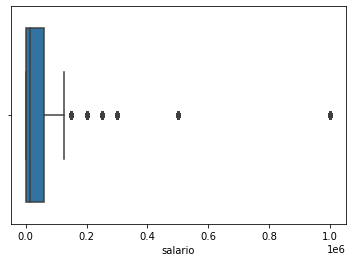

In [81]:
sns.boxplot(x= "salario", data=df[(df["puesto_trabajo"]!= "Student")]);

In [64]:
df["salario"].dtype

Int64Dtype()

### Renombrar últimas columnas

In [65]:
q_restantes = {'Q16':'Q16_frame_ml','Q17':'Q17_alg_ml','Q32':'Q32_prod_bigdata','Q34':'Q34_herramientas_bi'}

In [66]:
df.rename(columns = q_restantes, inplace =True)
df.head(2)

,age,gender,pais,estudios,puesto_trabajo,experiencia,lenguaje_recomendado,experiencia_ML,industria,tamaño_empresa,salario,herramienta_DA,lenguaje_utilizado,IDE,herramientas_visualizacion,Q16_frame_ml,Q17_alg_ml,Q32_prod_bigdata,Q34_herramientas_bi,Q10_kaggle,Q10_colab,Q10_none,Q28,Q39__github,Q39__kaggle,Q39__colab,Q39_none,Q40_coursera,Q40_edx,Q40_kaggle_learn_courses,Q40_datacamp,Q40_fast.ai,Q40_udacity,Q40_udemy,Q40_linkedin_learning,Q40_cloud-certification,Q40_university_courses,Q40_none,Q40_other,Q27_amazon_web_services_(aws),Q27_microsoft_azure,Q27_google_cloud_platform_(gcp),Q27_ibm_cloud_/_red_hat,Q27_oracle_cloud,Q27_sap_cloud,Q27_vmware_cloud,Q27_salesforce_cloud,Q27_alibaba_cloud,Q27_tencent_cloud,Q27_none,Q27_other,Q29_amazon_elastic_compute_cloud_(ec2),Q29_microsoft_azure_virtual_machines,Q29_google_cloud_compute_engine,Q29_none,Q31_amazon_sagemaker,Q31_azure_machine_learning_studio,Q31_google_cloud_vertex_ai,Q31_datarobot,Q31_databricks,Q31_dataiku,Q31_alteryx,Q31_rapidminer,Q31_none,Q31_other,Q32_mysql,Q32_postgresql,Q32_sqlite,Q32_oracle_database,Q32_mongodb,Q32_snowflake,Q32_ibm_db2,Q32_microsoft_sql_server,Q32_microsoft_azure_sql_database,Q32_microsoft_azure_cosmos_db,Q32_amazon_redshift,Q32_amazon_aurora,Q32_amazon_dynamodb,Q32_amazon_rds,Q32_google_cloud_bigquery,Q32_google_cloud_sql,Q32_google_cloud_firestore,Q32_google_cloud_bigtable,Q32_google_cloud_spanner,Q32_none,Q34_microsoft_power_bi,Q34_amazon_quicksight,Q34_google_data_studio,Q34_looker,Q34_tableau,Q34_salesforce,Q34_tableau_crm,Q34_qlik,Q34_domo,Q34_tibco_spotfire,Q34_alteryx,Q34_sisense,Q34_sap_analytics_cloud,Q34_microsoft_azure_synapse,Q34_thoughtspot,Q34_none,Q34_other,Q36_data_augmentation,Q36_feature_engineering/selection,Q36_model_selection,Q36_model_architecture_searches,Q36_hyperparameter_tuning,Q36_full_ml_pipelines,Q36_none,Q36_other,Q37_google_cloud_automl,Q37_h2o_driverless_ai,Q37_databricks_automl,Q37_datarobot_automl,Q37_amazon_sagemaker_autopilot,Q37_azure_automated_machine_learning,Q37_none,Q37_other,Q38_neptune.ai,Q38_weights_&_biases,Q38_comet.ml,Q38_sacred_+_omniboard,Q38_tensorboard,Q38_guild.ai,Q38_polyaxon,Q38_clearml,Q38_domino_model_monitor,Q38_mlflow,Q38_none,Q38_other
0,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,5-10 years,Manufacturing/Fabrication,50-249 employees,29999,"Local development environments (RStudio, Jupyt...","Python, R",Vim / Emacs,"Matplotlib ,Seaborn ,Ggplot / ggplot2 ,Shiny ...","Scikit-learn , TensorFlow ,Caret","Linear or Logistic Regression, Decision Trees ...",PostgreSQL,None,NaN,Colab Notebooks,NaN,NaN,GitHub,Kaggle,NaN,NaN,Coursera,edX,Kaggle Learn Courses,DataCamp,NaN,Udacity,Udemy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,Python,< 1 year,Manufacturing/Fabrication,"1000-9,999 employees",69999,"Advanced statistical software (SPSS, SAS, etc.)","SQL, C, C++, Java","Notepad++,Jupyter Notebook",Matplotlib,Scikit-learn,"Linear or Logistic Regression, Decision Trees ...",NaN,NaN,Kaggle Notebooks,Colab Notebooks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Kaggle Learn Courses,NaN,NaN,NaN,NaN,NaN,"Cloud-certification programs (direct from AWS,...",University Courses (resulting in a university ...,NaN,NaN,NaN,NaN,Google Cloud Platform (GCP),NaN,Oracle Cloud,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Google Cloud Compute Engine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,MySQL,NaN,SQLite,Oracle Database,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Google Cloud SQL,NaN,NaN,NaN,NaN,NaN,NaN,Google Data Studio,NaN,NaN,NaN,NaN,Qlik,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Automated model selection (e.g. au

In [67]:
#Guardamos un nuevo csv con todos los cambios realizados
df.to_csv("../Archivos/archivo_limpio.csv", index = False)

Intentando unir la col 39

In [69]:
df_copia = df.copy()
f_copia.head(1)


NameError: name 'f_copia' is not defined

In [ ]:
# Pasamos una función para unirlos, borra los nan y los convierte en un string vacío
df_copia['concat_q39'] = df_copia[['Q39__github','Q39__kaggle','Q39__colab','Q39_none']].apply(lambda x: ','.join(x.dropna().astype(str)), axis=1)
# Reemplazamos los strings vacios por nan
df_copia["concat_q39"].replace("", np.nan, inplace=True)

In [ ]:
df_copia.concat_q39.unique()

In [ ]:
# Hacemos un nuevo DF solo con las columnas, edad, genero, puesto de trabajo y concat_q39
df_q39 = df_copia[["age", "gender", "puesto_trabajo", "concat_q39"]]

In [ ]:
# Hacemos un split para convertirlo en lista
df_q39.loc[:,"concat_q39"] = df_q39['concat_q39'].str.split(",")